# Personalisation- Assignment 1


Korina - Kyriaki Zaromytidou 

### The code for this assignment is taken from the in-class notebook Week 3.1


##### I run the code for all tasks. I have  elaborated on the Task 2 - Song Similarity  & Task 3 - Top N Recommendations including comments based on the suggested questions for each of those tasks. ## I used a personal playlist for this assigment. The playlist is called  'Make it Rain - Live'. It has 18 songs of varied artist in English. 

Starting with installing libraries. 

In [58]:
!pip install spotipy

In [59]:
! pip install matplotlib

In [60]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [61]:

SPOTIPY_CLIENT_ID='4547ac9120de4cbba75a19ee6dc3b908'
SPOTIPY_CLIENT_SECRET='75fa035f5a0b47b7868e69a93ef878b4'

In [62]:

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(SPOTIPY_CLIENT_ID,SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [63]:
playlist_id = '2sU7avcVJBJ7rJrimHcoli'

In [64]:
limit = 50
trim = True

In [65]:
#Get playlsit
playlist = sp.playlist(playlist_id)
#Extract tracks
tracks = playlist["tracks"]["items"]
if trim:
    tracks = tracks[-limit:]
#Extract track IDs
ids = [track["track"]["id"] for track in tracks]
#Get audio features for tracks
features =  pd.DataFrame(sp.audio_features(ids))    
#Label dataframe rows with track name and artist
labels = [track["track"]["artists"][0]["name"] + " - "+ track["track"]["name"] for track in tracks]
features.index = labels

In [46]:
features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
Foy Vance - Make It Rain - Live,0.367,0.309,9,-10.167,0,0.0832,0.1450,0.000010,0.3900,0.216,83.452,audio_features,3C0tW8SMfSk0jjd9WDASa2,spotify:track:3C0tW8SMfSk0jjd9WDASa2,https://api.spotify.com/v1/tracks/3C0tW8SMfSk0...,https://api.spotify.com/v1/audio-analysis/3C0t...,566653,3
Michael Kiwanuka - Love & Hate,0.308,0.513,0,-7.808,1,0.0292,0.1740,0.000342,0.1870,0.489,82.283,audio_features,5q0gPpBVNNusEenuXo3hw3,spotify:track:5q0gPpBVNNusEenuXo3hw3,https://api.spotify.com/v1/tracks/5q0gPpBVNNus...,https://api.spotify.com/v1/audio-analysis/5q0g...,427093,4
Jack Johnson - Good People,0.721,0.588,11,-6.018,1,0.0331,0.2190,0.000072,0.0955,0.907,176.085,audio_features,0aC48311YnCzupPDwY0xKy,spotify:track:0aC48311YnCzupPDwY0xKy,https://api.spotify.com/v1/tracks/0aC48311YnCz...,https://api.spotify.com/v1/audio-analysis/0aC4...,208813,4
Son Little - Mad About You,0.599,0.377,7,-9.829,1,0.1050,0.4410,0.008130,0.1050,0.543,74.314,audio_features,6OEBvlvSfz7vcwZvpU0erU,spotify:track:6OEBvlvSfz7vcwZvpU0erU,https://api.spotify.com/v1/tracks/6OEBvlvSfz7v...,https://api.spotify.com/v1/audio-analysis/6OEB...,213137,4
Foy Vance - She Burns,0.730,0.403,4,-10.146,1,0.0483,0.7180,0.002420,0.0985,0.502,124.901,audio_features,70rOXPlQGVjEkboInw5EBk,spotify:track:70rOXPlQGVjEkboInw5EBk,https://api.spotify.com/v1/tracks/70rOXPlQGVjE...,https://api.spotify.com/v1/audio-analysis/70rO...,229227,4
KALEO - Way down We Go - Recorded at Spotify Studios NYC,0.602,0.459,8,-7.167,0,0.0360,0.6300,0.000165,0.1460,0.366,86.380,audio_features,3inSmIa388icRdpDi5ecJd,spotify:track:3inSmIa388icRdpDi5ecJd,https://api.spotify.com/v1/tracks/3inSmIa388ic...,https://api.spotify.com/v1/audio-analysis/3inS...,193297,4
Leon Bridges - Coming Home,0.427,0.465,6,-6.595,1,0.0291,0.4610,0.000055,0.1540,0.458,112.137,audio_features,5EA06TsQmqmQXZiEhr1AaM,spotify:track:5EA06TsQmqmQXZiEhr1AaM,https://api.spotify.com/v1/tracks/5EA06TsQmqmQ...,https://api.spotify.com/v1/audio-analysis/5EA0...,206387,3
Michael Kiwanuka - Home Again,0.564,0.320,9,-11.473,0,0.0306,0.7060,0.000000,0.1230,0.266,85.891,audio_features,5yGVHzJ2Se8pDzR7FIYUlU,spotify:track:5yGVHzJ2Se8pDzR7FIYUlU,https://api.spotify.com/v1/tracks/5yGVHzJ2Se8p...,https://api.spotify.com/v1/audio-analysis/5yGV...,209920,4
Michael Kiwanuka - One More Night,0.684,0.764,6,-5.342,0,0.0254,0.0129,0.000171,0.1410,0.944,107.806,audio_features,0f2zcrhhHT59aIGQvRlTZ1,spotify:track:0f2zcrhhHT59aIGQvRlTZ1,https://api.spotify.com/v1/tracks/0f2zcrhhHT59...,https://api.spotify.com/v1/audio-analysis/0f2z...,233413,4
Robert Plant - Can't Let Go,0.713,0.824,10,-6.895,0,0.0502,0.1150,0.017000,0.1150,0.893,89.929,audio_features,5SMb9DajcX67GuiL4urSjp,spotify:track:5SMb9DajcX67GuiL4urSjp,https://api.spotify.com/v1/tracks/5SMb9DajcX67...,https://api.spotify.com/v1/audio-analysis/5SMb...,221435,4


### Audio Features 

In [47]:
features.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [48]:
my_features = ['danceability', 'energy', 'key', 
            'loudness', 'mode', 'speechiness', 
            'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo', 'duration_ms', 
            'time_signature']
features = features[my_features]
features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Foy Vance - Make It Rain - Live,0.367,0.309,9,-10.167,0,0.0832,0.1450,0.000010,0.3900,0.216,83.452,566653,3
Michael Kiwanuka - Love & Hate,0.308,0.513,0,-7.808,1,0.0292,0.1740,0.000342,0.1870,0.489,82.283,427093,4
Jack Johnson - Good People,0.721,0.588,11,-6.018,1,0.0331,0.2190,0.000072,0.0955,0.907,176.085,208813,4
Son Little - Mad About You,0.599,0.377,7,-9.829,1,0.1050,0.4410,0.008130,0.1050,0.543,74.314,213137,4
Foy Vance - She Burns,0.730,0.403,4,-10.146,1,0.0483,0.7180,0.002420,0.0985,0.502,124.901,229227,4
KALEO - Way down We Go - Recorded at Spotify Studios NYC,0.602,0.459,8,-7.167,0,0.0360,0.6300,0.000165,0.1460,0.366,86.380,193297,4
Leon Bridges - Coming Home,0.427,0.465,6,-6.595,1,0.0291,0.4610,0.000055,0.1540,0.458,112.137,206387,3
Michael Kiwanuka - Home Again,0.564,0.320,9,-11.473,0,0.0306,0.7060,0.000000,0.1230,0.266,85.891,209920,4
Michael Kiwanuka - One More Night,0.684,0.764,6,-5.342,0,0.0254,0.0129,0.000171,0.1410,0.944,107.806,233413,4
Robert Plant - Can't Let Go,0.713,0.824,10,-6.895,0,0.0502,0.1150,0.017000,0.1150,0.893,89.929,221435,4


### Task 1 - Sorting by Audio Features 

In [68]:
sort_by = 'liveness'
features.sort_values(by = sort_by, ascending = False)[:16]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
Michael Kiwanuka - Cold Little Heart - Radio Edit,0.629,0.580,7,-6.208,0,0.0278,0.3570,0.000353,0.4360,0.655,110.264,audio_features,7KX65PC1UZuImsUInThbav,spotify:track:7KX65PC1UZuImsUInThbav,https://api.spotify.com/v1/tracks/7KX65PC1UZuI...,https://api.spotify.com/v1/audio-analysis/7KX6...,210300,4
Foy Vance - Make It Rain - Live,0.367,0.309,9,-10.167,0,0.0832,0.1450,0.000010,0.3900,0.216,83.452,audio_features,3C0tW8SMfSk0jjd9WDASa2,spotify:track:3C0tW8SMfSk0jjd9WDASa2,https://api.spotify.com/v1/tracks/3C0tW8SMfSk0...,https://api.spotify.com/v1/audio-analysis/3C0t...,566653,3
David Gray - Sail Away,0.651,0.568,0,-7.882,0,0.0399,0.1190,0.000003,0.3160,0.188,134.828,audio_features,7w5GAUVhimHVPSwTsPnxq5,spotify:track:7w5GAUVhimHVPSwTsPnxq5,https://api.spotify.com/v1/tracks/7w5GAUVhimHV...,https://api.spotify.com/v1/audio-analysis/7w5G...,315373,4
The Teskey Brothers - So Caught Up,0.744,0.692,4,-6.561,0,0.0260,0.3090,0.000550,0.3030,0.899,99.045,audio_features,6QvdMd39Vywf87kHx03xgX,spotify:track:6QvdMd39Vywf87kHx03xgX,https://api.spotify.com/v1/tracks/6QvdMd39Vywf...,https://api.spotify.com/v1/audio-analysis/6Qvd...,228553,4
Michael Kiwanuka - Love & Hate,0.308,0.513,0,-7.808,1,0.0292,0.1740,0.000342,0.1870,0.489,82.283,audio_features,5q0gPpBVNNusEenuXo3hw3,spotify:track:5q0gPpBVNNusEenuXo3hw3,https://api.spotify.com/v1/tracks/5q0gPpBVNNus...,https://api.spotify.com/v1/audio-analysis/5q0g...,427093,4
Ed Sheeran - Thinking out Loud,0.781,0.445,2,-6.061,1,0.0295,0.4740,0.000000,0.1840,0.591,78.998,audio_features,34gCuhDGsG4bRPIf9bb02f,spotify:track:34gCuhDGsG4bRPIf9bb02f,https://api.spotify.com/v1/tracks/34gCuhDGsG4b...,https://api.spotify.com/v1/audio-analysis/34gC...,281560,4
Leon Bridges - Coming Home,0.427,0.465,6,-6.595,1,0.0291,0.4610,0.000055,0.1540,0.458,112.137,audio_features,5EA06TsQmqmQXZiEhr1AaM,spotify:track:5EA06TsQmqmQXZiEhr1AaM,https://api.spotify.com/v1/tracks/5EA06TsQmqmQ...,https://api.spotify.com/v1/audio-analysis/5EA0...,206387,3
Sia - Elastic Heart,0.421,0.791,9,-4.998,1,0.0496,0.0117,0.000015,0.1460,0.499,130.075,audio_features,5S9lfZu1YF8xKkgSsqL2Bd,spotify:track:5S9lfZu1YF8xKkgSsqL2Bd,https://api.spotify.com/v1/tracks/5S9lfZu1YF8x...,https://api.spotify.com/v1/audio-analysis/5S9l...,257200,4
KALEO - Way down We Go - Recorded at Spotify Studios NYC,0.602,0.459,8,-7.167,0,0.0360,0.6300,0.000165,0.1460,0.366,86.380,audio_features,3inSmIa388icRdpDi5ecJd,spotify:track:3inSmIa388icRdpDi5ecJd,https://api.spotify.com/v1/tracks/3inSmIa388ic...,https://api.spotify.com/v1/audio-analysis/3inS...,193297,4
Michael Kiwanuka - One More Night,0.684,0.764,6,-5.342,0,0.0254,0.0129,0.000171,0.1410,0.944,107.806,audio_features,0f2zcrhhHT59aIGQvRlTZ1,spotify:track:0f2zcrhhHT59aIGQvRlTZ1,https://api.spotify.com/v1/tracks/0f2zcrhhHT59...,https://api.spotify.com/v1/audio-analysis/0f2z...,233413,4


### Task 2 - Song Similarity 

In [50]:
!pip install -U scikit-learn

In [51]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity as cosine
from sklearn.preprocessing import StandardScaler

In [52]:
my_subset_features = ['danceability', 'energy', 'key', 
            'loudness', 'mode', 'speechiness', 
            'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo', 'duration_ms', 
            'time_signature']

In [90]:
#Get subset
subset_features = features[my_subset_features]
#Standardise
scaled_features = StandardScaler().fit_transform(subset_features)
#Get cosine distances
similarities = cosine(scaled_features)
#Visualise 
similarities = pd.DataFrame(similarities, columns = features.index, index = features.index)
similarities.style.background_gradient(cmap='Greens')

,Foy Vance - Make It Rain - Live,Michael Kiwanuka - Love & Hate,Jack Johnson - Good People,Son Little - Mad About You,Foy Vance - She Burns,KALEO - Way down We Go - Recorded at Spotify Studios NYC,Leon Bridges - Coming Home,Michael Kiwanuka - Home Again,Michael Kiwanuka - One More Night,Robert Plant - Can't Let Go,Michael Kiwanuka - Cold Little Heart - Radio Edit,The Teskey Brothers - So Caught Up,David Gray - Sail Away,Irene Skylakaki - Tonight,Ed Sheeran - Thinking out Loud,Sam Smith - I'm Not The Only One,Sia - Elastic Heart,Sia - Chandelier
Foy Vance - Make It Rain - Live,1.000000,0.353336,-0.447927,0.211017,-0.196242,-0.037723,0.165624,0.196324,-0.419857,-0.216641,0.032405,-0.308971,0.276958,-0.270268,-0.281750,-0.427900,-0.079916,-0.477857
Michael Kiwanuka - Love & Hate,0.353336,1.000000,-0.480976,-0.135053,-0.200916,-0.372784,0.154782,-0.142596,-0.218802,-0.382891,-0.266967,-0.249589,0.226006,-0.171548,0.151132,-0.001168,0.088039,0.286834
Jack Johnson - Good People,-0.447927,-0.480976,1.000000,-0.263814,0.131830,-0.331941,0.028010,-0.337017,0.407509,0.123922,0.026885,0.110258,-0.210348,0.099026,-0.190130,-0.100596,0.429484,0.138891
Son Little - Mad About You,0.211017,-0.135053,-0.263814,1.000000,0.401505,0.020201,-0.133272,0.202878,-0.536893,0.240372,-0.484082,-0.485010,-0.344963,0.222327,-0.072838,0.097482,-0.235865,-0.174028
Foy Vance - She Burns,-0.196242,-0.200916,0.131830,0.401505,1.000000,0.182974,0.081430,0.459199,-0.546651,-0.236773,-0.363601,-0.284014,-0.042966,0.287947,0.312450,0.363954,-0.506180,-0.318613
KALEO - Way down We Go - Recorded at Spotify Studios NYC,-0.037723,-0.372784,-0.331941,0.020201,0.182974,1.000000,0.068731,0.788646,-0.275331,-0.173143,0.138773,-0.077428,-0.120364,0.440898,0.043978,0.331654,-0.477075,-0.357831
Leon Bridges - Coming Home,0.165624,0.154782,0.028010,-0.133272,0.081430,0.068731,1.000000,0.099042,-0.317333,-0.388234,-0.142949,-0.361815,-0.162261,0.294361,-0.032877,0.169252,0.109441,-0.289608
Michael Kiwanuka - Home Again,0.196324,-0.142596,-0.337017,0.202878,0.459199,0.788646,0.099042,1.000000,-0.521920,-0.264567,-0.070490,-0.297755,-0.058731,0.489273,-0.069140,0.126728,-0.582288,-0.574904
Michael Kiwanuka - One More Night,-0.419857,-0.218802,0.407509,-0.536893,-0.546651,-0.275331,-0.317333,-0.521920,1.000000,0.432886,0.301706,0.725469,-0.020172,-0.288092,-0.073524,-0.223072,0.278383,0.313207
Robert Plant - Can't Let Go,-0.216641,-0.382891,0.123922,0.240372,-0.236773,-0.173143,-0.388234,-0.264567,0.432886,1.000000,0.007625,0.269894,-0.287390,-0.159595,-0.301365,-0.289675,0.065829,-0.002092


##### Based on the DataFrame that was created, the songs that appear to be mostly similar (based on all features) are "KALEO - Way Down We Go - Recorded at Spotify Studios NYC" (https://www.youtube.com/watch?v=0-7IHOXkiV8) and "Home Again" by Michael Kiwanuka (https://www.youtube.com/watch?v=kJ4s3G7hgR4). These songs share several similarities, such as a slow and gentle tempo, and both are performed by male artists. However, the Kaleo song does have some parts that exhibit higher intensity. With a similarity score of 0.788646, the similarity between these songs is quite high. Looking also at the sorting table above, both songs seem to have same mode and very similar speechiness. 


#### I then re-run the code, changing the features that I thought that were similar in the 2 songs (tempo, danceability,liveness and valence) and was proven correct with the same songs have a very high similarity of 0.963927.  Some other songs also appeared to be quite similar (similarity of 0.899831) in those features such as Sia's  'Elastic Heart' and Leon Bridges with 'Coming Home', which was quite interesting as these songs I wouldnt think that are similar. In the previous, all features DataFrame, their similarity was very low - 0.109.  

In [94]:
my_subset_features2 = ['danceability', 
            'liveness', 'valence', 'tempo', 
          ]

In [95]:
subset_features = features[my_subset_features2]
scaled_features = StandardScaler().fit_transform(subset_features)
similarities = cosine(scaled_features) 
similarities = pd.DataFrame(similarities, columns = features.index, index = features.index)
similarities.style.background_gradient(cmap='Greens')

,Foy Vance - Make It Rain - Live,Michael Kiwanuka - Love & Hate,Jack Johnson - Good People,Son Little - Mad About You,Foy Vance - She Burns,KALEO - Way down We Go - Recorded at Spotify Studios NYC,Leon Bridges - Coming Home,Michael Kiwanuka - Home Again,Michael Kiwanuka - One More Night,Robert Plant - Can't Let Go,Michael Kiwanuka - Cold Little Heart - Radio Edit,The Teskey Brothers - So Caught Up,David Gray - Sail Away,Irene Skylakaki - Tonight,Ed Sheeran - Thinking out Loud,Sam Smith - I'm Not The Only One,Sia - Elastic Heart,Sia - Chandelier
Foy Vance - Make It Rain - Live,1.000000,0.664952,-0.713358,-0.115373,-0.704466,0.318696,0.452181,0.373298,-0.779402,-0.758063,0.461298,-0.227453,0.455306,-0.248867,-0.287560,-0.400121,0.176147,-0.078983
Michael Kiwanuka - Love & Hate,0.664952,1.000000,-0.637676,0.251300,-0.812866,0.235280,0.746316,0.366974,-0.511378,-0.454535,-0.130059,-0.503584,-0.234483,0.401691,-0.544006,-0.187028,0.433033,0.545482
Jack Johnson - Good People,-0.713358,-0.637676,1.000000,-0.606311,0.667204,-0.743041,-0.141082,-0.690092,0.621543,0.315600,-0.013001,0.261911,0.050521,-0.387631,-0.213833,-0.307248,0.296860,0.183408
Son Little - Mad About You,-0.115373,0.251300,-0.606311,1.000000,-0.184698,0.680230,-0.187816,0.575735,-0.021811,0.374861,-0.586509,-0.211345,-0.642983,0.897594,0.512279,0.866783,-0.504957,-0.027368
Foy Vance - She Burns,-0.704466,-0.812866,0.667204,-0.184698,1.000000,-0.015001,-0.299766,-0.019160,0.226334,0.172389,-0.349067,-0.075003,0.260010,-0.208066,0.196071,0.316416,-0.012502,-0.066694
KALEO - Way down We Go - Recorded at Spotify Studios NYC,0.318696,0.235280,-0.743041,0.680230,-0.015001,1.000000,0.067232,0.963927,-0.671707,-0.314767,-0.425615,-0.560083,0.101832,0.428148,0.335824,0.703880,-0.276673,-0.132514
Leon Bridges - Coming Home,0.452181,0.746316,-0.141082,-0.187816,-0.299766,0.067232,1.000000,0.319545,-0.589329,-0.717125,-0.291411,-0.786347,0.122413,0.081147,-0.911147,-0.372519,0.899831,0.834323
Michael Kiwanuka - Home Again,0.373298,0.366974,-0.690092,0.575735,-0.019160,0.963927,0.319545,1.000000,-0.783255,-0.485659,-0.510712,-0.755560,0.152407,0.410202,0.078442,0.586148,-0.011184,0.101903
Michael Kiwanuka - One More Night,-0.779402,-0.511378,0.621543,-0.021811,0.226334,-0.671707,-0.589329,-0.783255,1.000000,0.909488,0.037381,0.699008,-0.581701,0.111881,0.313822,0.033507,-0.325596,-0.121825
Robert Plant - Can't Let Go,-0.758063,-0.454535,0.315600,0.374861,0.172389,-0.314767,-0.717125,-0.485659,0.909488,1.000000,-0.135568,0.625317,-0.728680,0.402794,0.593959,0.404594,-0.598254,-0.247597


### Task 3 - Top N Recommendations 

##### I ran the code for the song "Good People" by Jack Johnson. 

Output: Index(['Sia - Elastic Heart', 'Michael Kiwanuka - One More Night',
       'Sia - Chandelier', 'Foy Vance - She Burns',
       'Robert Plant - Can't Let Go', 'The Teskey Brothers - So Caught Up',
       'Irene Skylakaki - Tonight', 'Leon Bridges - Coming Home',
       'Michael Kiwanuka - Cold Little Heart - Radio Edit',
       'Sam Smith - I'm Not The Only One'],
      dtype='object')



The results were quite surprising, especially for the first song "Elastic Heart" by Sia. The second and fourth songs, "One More Night" by Michael Kiwanuka and "She Burns" by Foy Vance, appeared to be more similar in terms of tone, feeling, and tempo. Around the fifth song, the songs started to deviate significantly. Hence, there was no point in re-running the code with n < 10, as the songs had already deviated. However, it should be noted that this is a small playlist.

I then re-ran the code for a smaller subset of features, specifically ['danceability', 'liveness', 'valence', 'tempo']. In this case, the results (see below) were generally closer in terms of similarity. The first recommendation is "She Burns" by Foy Vance, which likely has a similar tempo and feeling as both songs are performed by male artists. Similarly, "One More Night" by Michael Kiwanuka is also suggested, which may be slightly more upbeat. However, the third suggested song appears to deviate more compared to the previous two, and overall, the differences between the songs seem to be greater than their similarities. 


In [99]:
track = "Jack Johnson - Good People"

In [100]:
#How many tracks to recommend
n = 10

In [101]:
similarities.sort_values(by = track, ascending=False)[track].index[1:n+1]

Index(['Foy Vance - She Burns', 'Michael Kiwanuka - One More Night',
       'Robert Plant - Can't Let Go', 'Sia - Elastic Heart',
       'The Teskey Brothers - So Caught Up', 'Sia - Chandelier',
       'David Gray - Sail Away',
       'Michael Kiwanuka - Cold Little Heart - Radio Edit',
       'Leon Bridges - Coming Home', 'Ed Sheeran - Thinking out Loud'],
      dtype='object')

### Task 4 - PCA Visualisation

In [104]:
num_dimensions = 2 

#Reduce dimensions
pca = PCA(n_components=num_dimensions)
reduced_features = pca.fit_transform(scaled_features)

<Figure size 800x800 with 0 Axes>

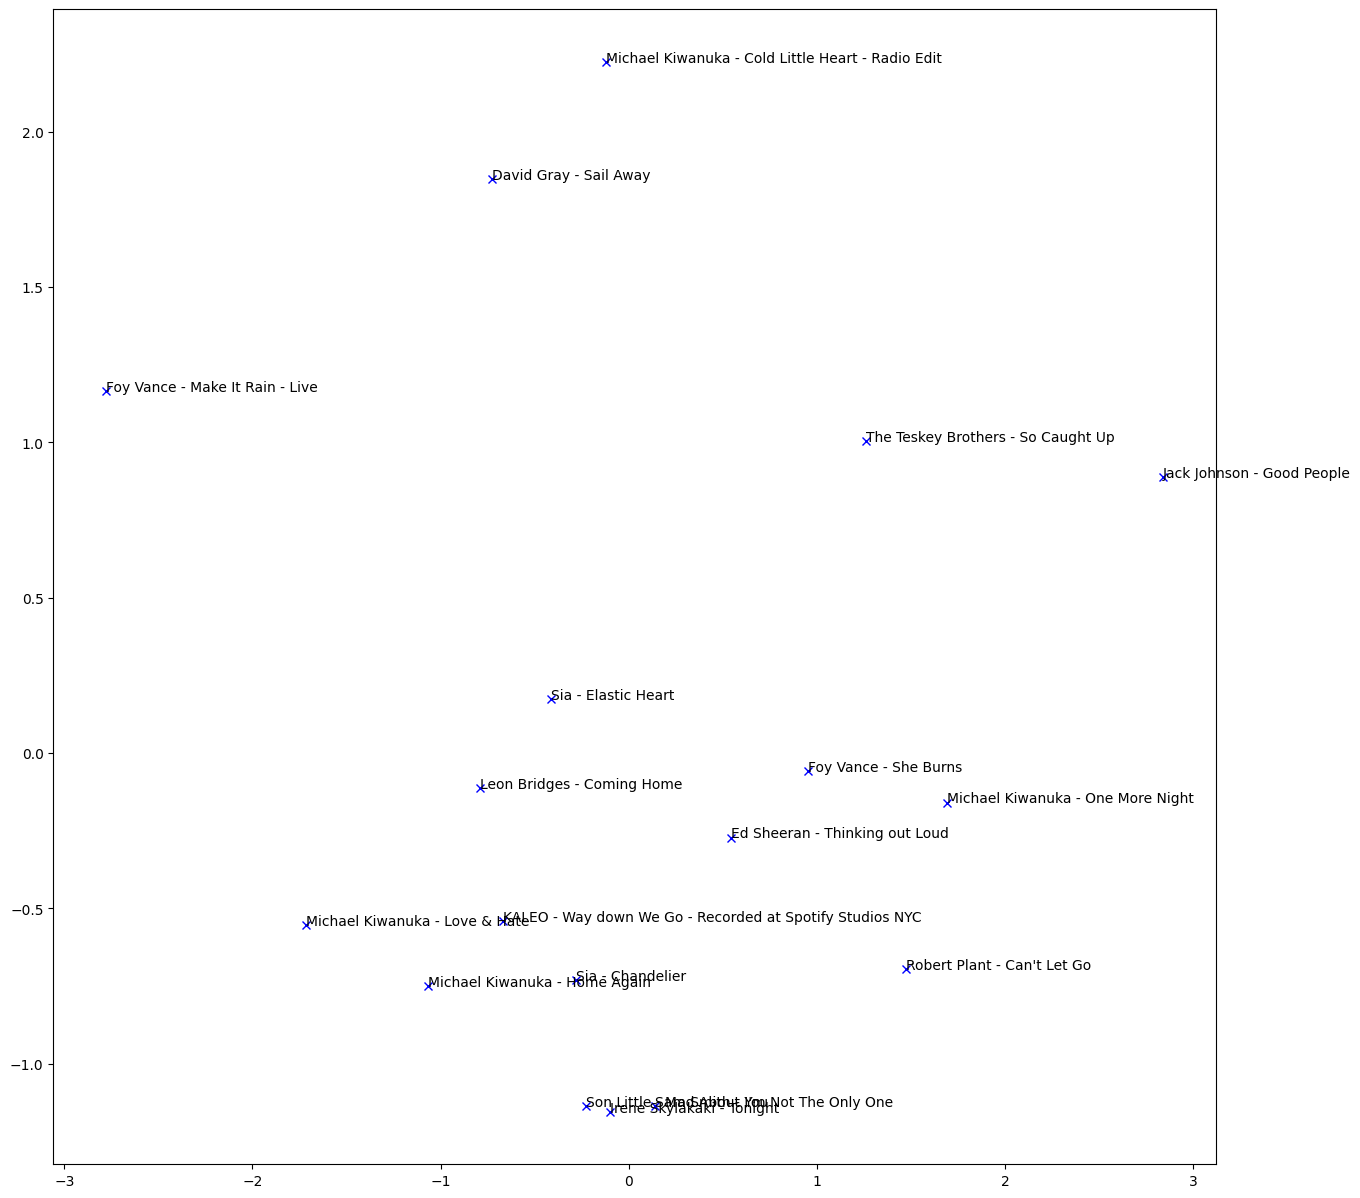

In [103]:
#Plot
plt.figure(figsize=(8, 8))
fig,ax = plt.subplots(figsize=(15,15))
x = reduced_features[:,0]
y = reduced_features[:,1]
ax.plot(x,y,"bx")
annotations = subset_features.index
for i, label in enumerate(annotations):
    ax.annotate(label, (x[i], y[i]),alpha=1)

Thank you for reading through - hope it was not too confusing. :) 